In [56]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

from PIL import Image

In [60]:
pip list

Package                   Version
------------------------- -----------
asttokens                 2.0.5
attrs                     24.2.0
certifi                   2025.1.31
charset-normalizer        3.4.1
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.21.1
filelock                  3.18.0
fonttools                 4.54.1
fsspec                    2025.3.0
idna                      3.10
ipykernel                 6.29.5
ipython                   8.27.0
jedi                      0.19.1
Jinja2                    3.1.6
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2024.10.1
jupyter_client            8.6.0
jupyter_core              5.7.2
kiwisolver                1.4.7
MarkupSafe                3.0.2
matplotlib   

## YOLO

In [2]:
# Загрузка модели YOLOv8
model = YOLO('yolov8n.pt')

In [4]:
image = cv2.imread('test.png')

In [ ]:
results = model(image)[0]


0: 640x640 4 persons, 3 cars, 1 truck, 3 traffic lights, 2 stop signs, 69.0ms
Speed: 4.1ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


In [28]:
results.boxes.cls.cpu()

tensor([ 2., 11.,  9.,  9.,  0., 11.,  9.,  0.,  0.,  2.,  2.,  7.,  0.])

In [29]:
results.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

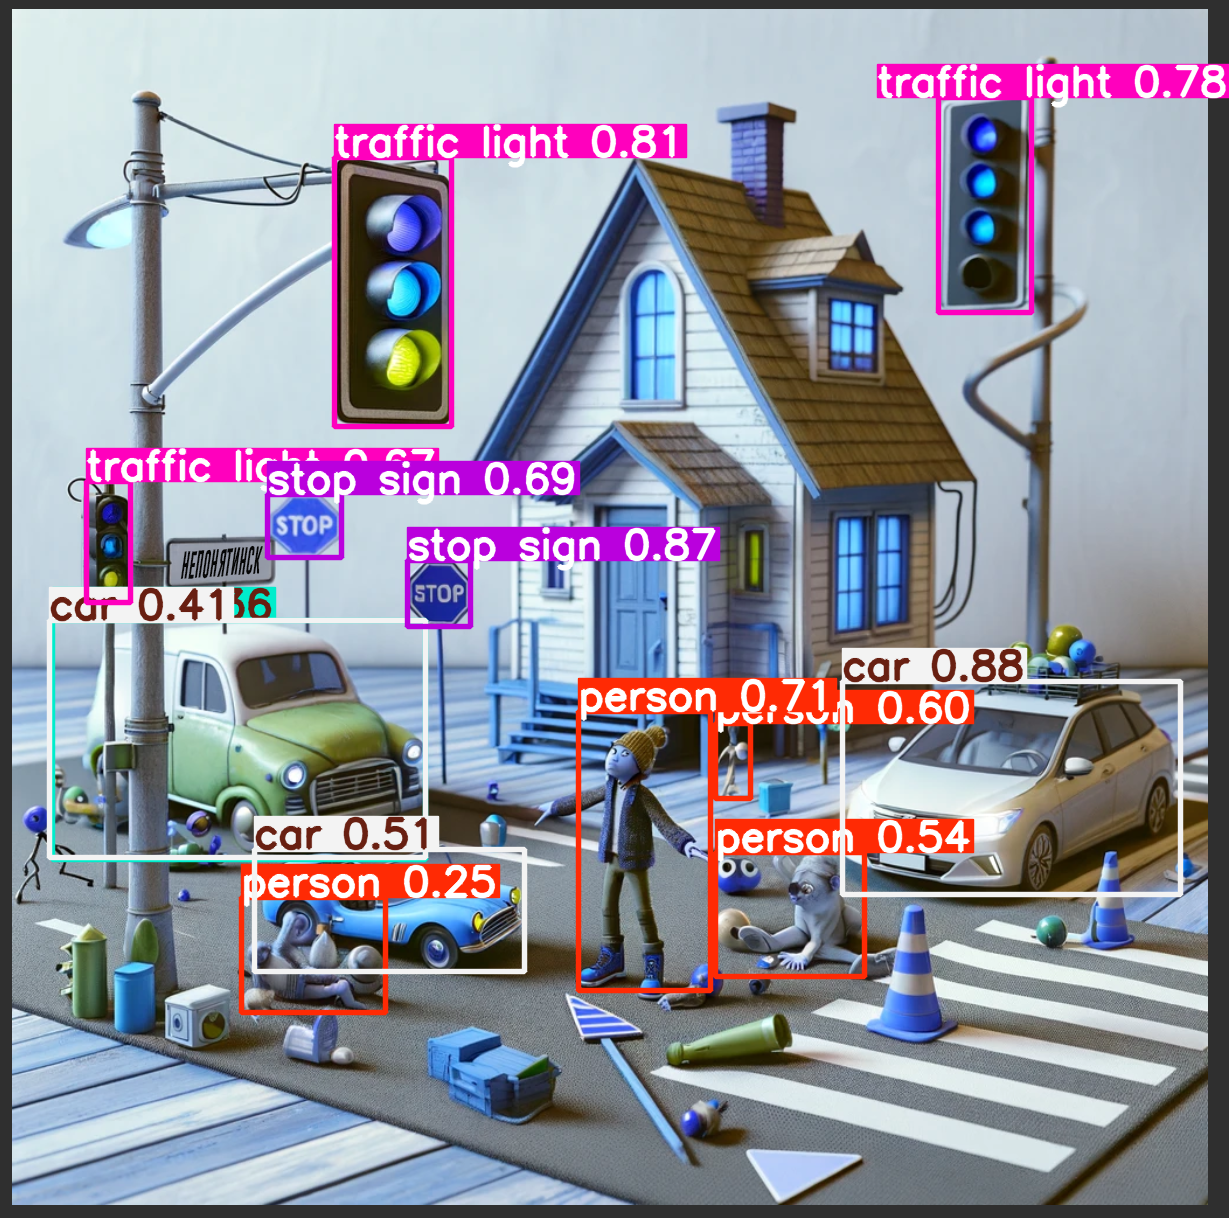

In [24]:
Image.fromarray(results.plot())

In [3]:
# Список цветов для различных классов
colors = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255),
    (255, 0, 255), (192, 192, 192), (128, 128, 128), (128, 0, 0), (128, 128, 0),
    (0, 128, 0), (128, 0, 128), (0, 128, 128), (0, 0, 128), (72, 61, 139),
    (47, 79, 79), (47, 79, 47), (0, 206, 209), (148, 0, 211), (255, 20, 147)
]

# Функция для обработки изображения
def process_image(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    results = model(image)[0]
    
    # Получение оригинального изображения и результатов
    image = results.orig_img
    classes_names = results.names
    classes = results.boxes.cls.cpu().numpy()
    boxes = results.boxes.xyxy.cpu().numpy().astype(np.int32)

    # Подготовка словаря для группировки результатов по классам
    grouped_objects = {}

    # Рисование рамок и группировка результатов
    for class_id, box in zip(classes, boxes):
        class_name = classes_names[int(class_id)]
        color = colors[int(class_id) % len(colors)]  # Выбор цвета для класса
        if class_name not in grouped_objects:
            grouped_objects[class_name] = []
        grouped_objects[class_name].append(box)

        # Рисование рамок на изображении
        x1, y1, x2, y2 = box
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Сохранение измененного изображения
    new_image_path = os.path.splitext(image_path)[0] + '_yolo' + os.path.splitext(image_path)[1]
    cv2.imwrite(new_image_path, image)

    # Сохранение данных в текстовый файл
    text_file_path = os.path.splitext(image_path)[0] + '_data.txt'
    with open(text_file_path, 'w') as f:
        for class_name, details in grouped_objects.items():
            f.write(f"{class_name}:\n")
            for detail in details:
                f.write(f"Coordinates: ({detail[0]}, {detail[1]}, {detail[2]}, {detail[3]})\n")

    print(f"Processed {image_path}:")
    print(f"Saved bounding-box image to {new_image_path}")
    print(f"Saved data to {text_file_path}")


process_image('test.png')


0: 640x640 4 persons, 3 cars, 1 truck, 3 traffic lights, 2 stop signs, 78.9ms
Speed: 4.3ms preprocess, 78.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Processed test.png:
Saved bounding-box image to test_yolo.png
Saved data to test_data.txt


## GAN

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image

### MNIST

In [34]:
# / Преобразование данных в тензоры и нормализация.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# / Загрузка MNIST.
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=0)

In [27]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(128, 1024) # / Входной шум размером 128.
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 784)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)
        return nn.Tanh()(x)
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 1)
        self.activation = nn.LeakyReLU(0.1)
    
    # / Выходные значения от 0 до 1 (вероятность того, что изображение настоящее).
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return nn.Sigmoid()(x)

### CIFAR-10

In [39]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


In [47]:
# / Параметры обучения.
epochs = 100 
latent_dim = 128
num_examples_to_generate = 16

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(128, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
    # / Преобразует входной вектор размера (batch_size, 128) в тензор размера (batch_size, 128, 1, 1).
    # / и прогоняет его через сверточные слои.
    # / На выходе получается фейковое изображение (тензор) размера (3, 32, 32).
    def forward(self, x):
        return self.main(x.view(-1, 128, 1, 1))

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    # / На выходе - одно значение с предсказанием, является изображение реальным или фейковым.
    def forward(self, x):
        return self.main(x).view(-1, 1)

### Обучение модели.

In [49]:
# / Инициализация.
G = Generator() 
D = Discriminator() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G.to(device)
D.to(device)

# / Оптимизаторы.
G_optimizer = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))
loss = nn.BCELoss()

# / Параметры обучения.
epochs = 50 # / Количество эпох.
latent_dim = 128 # / Размерность входного шума для генератора.
num_examples_to_generate = 16 # / Количество изображений для сохранения.

# / Директория для сохранения сгенерированных изображений.
output_dir = 'generated_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [53]:
import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

In [55]:
# / Сохранение изображений до начала обучения.
with torch.no_grad(): # / Отключаем отслеживание градиента для генерации изображений.
    # / -> torch.Size([latent_dim, num_examples_to_generate])
    fixed_noise = torch.randn(num_examples_to_generate, latent_dim).to(device)
    
    # / Генерируем изображения с шумом при помощи генератора.
    generated_images = G(fixed_noise) 
    save_image(generated_images, os.path.join(output_dir, f'generated_epoch_0.png'), normalize=True)
    print(f'Примеры сгенерированных изображений на нулевой эпохе сохранены в {output_dir}/generated_epoch_0.png')

for epoch in range(epochs):
    for idx, (imgs, _) in enumerate(train_loader):
        idx += 1
        # / ОБУЧЕНИЕ ДИСКРИМИНАТОРА.
        real_inputs = imgs.to(device) # / imgs - батч с изображениями.
        #print('real_inputs.shape: ', real_inputs.shape)

        # / Прогоняем реальные изображения через дискриминатор.
        real_outputs = D(real_inputs)
        #print('real_outputs.shape: ', real_outputs.shape)

        real_label = torch.ones(real_inputs.shape[0], 1).to(device) # / Метки (1) для реальных изображений.
        #print('real_label.shape: ', real_label.shape)
        
        # / Генерация шума в диапазоне [-1, 1] для дискриминатора.
        # / noise.shape -> torch.Size([batch_size, latent_dim]).
        noise = (torch.rand(real_inputs.shape[0], latent_dim) - 0.5) / 0.5
        noise = noise.to(device)
        #print('noise.shape: ', noise.shape)

        # / Генерируем фейковые изображения с помощью генератора.
        fake_inputs = G(noise)
        #print('fake_inputs.shape: ', fake_inputs.shape)

        # / Прогоняем фейковые изображения через дискриминатор.
        fake_outputs = D(fake_inputs)
        #print('fake_outputs.shape: ', fake_outputs.shape)

        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device) # / Метки (0) для фейковых изображений.
        #print('fake_label.shape: ', fake_label.shape)

        # / Объединение выходов дискриминатора на реальных и фейковых изображениях.
        outputs = torch.cat((real_outputs, fake_outputs), 0)
        #print('outputs.shape: ', outputs.shape)
        # / Объединение меток.
        targets = torch.cat((real_label, fake_label), 0)
        #print('targets.shape: ', targets.shape)
        
        # / Расчет потерь дискриминатора.
        D_loss = loss(outputs, targets)

        # / Оптимизация дискриминатора.
        D_optimizer.zero_grad()
        D_loss.backward()
        D_optimizer.step()

        # / ОБУЧЕНИЕ ГЕНЕРАТОРА.
        # / Генерация шума в диапазоне [-1, 1] для генератора.
        noise = (torch.rand(real_inputs.shape[0], latent_dim) - 0.5) / 0.5
        noise = noise.to(device)
        
        # / Генерируем фейковые изображения с помощью генератора.
        fake_inputs = G(noise)
        # / Прогоняем фейковые изображения через дискриминатор.
        fake_outputs = D(fake_inputs)
        # / Метки для генератора - хотим, чтобы дискриминатор думал, что фейковые изображения - реальные (1).
        fake_targets = torch.ones([fake_inputs.shape[0], 1]).to(device) 

        # / Расчет потерь генератора.
        G_loss = loss(fake_outputs, fake_targets)

        # / Оптимизация генератора.
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()

        # / Вывод прогресса.
        if idx % 100 == 0 or idx == len(train_loader):
            print(f'Эпоха [{epoch}/{epochs}] Итерация [{idx}/{len(train_loader)}]: discriminator_loss: {D_loss.item():.3f} generator_loss: {G_loss.item():.3f}')

    # / Сохранение модели генератора G каждые 10 эпох.
    if (epoch+1) % 10 == 0:
        torch.save(G, f'Generator_epoch_{epoch+1}.pth')
        print('Модель генератора сохранена.')

    # / Сохранение сгенерированных изображений каждые 10 эпох.
    if (epoch+1) % 10 == 0:
        with torch.no_grad(): 
            fixed_noise = torch.randn(num_examples_to_generate, latent_dim).to(device)
            generated_images = G(fixed_noise) # Генерируем изображения
            save_image(generated_images, os.path.join(output_dir, f'generated_epoch_{epoch+1}.png'), normalize=True)
            print(f'Примеры сгенерированных изображений сохранены в {output_dir}/generated_epoch_{epoch+1}.png')

Примеры сгенерированных изображений на нулевой эпохе сохранены в generated_images/generated_epoch_0.png
Эпоха [0/50] Итерация [100/782]: discriminator_loss: 0.138 generator_loss: 2.508
Эпоха [0/50] Итерация [200/782]: discriminator_loss: 0.187 generator_loss: 3.142
Эпоха [0/50] Итерация [300/782]: discriminator_loss: 0.206 generator_loss: 2.104
Эпоха [0/50] Итерация [400/782]: discriminator_loss: 0.230 generator_loss: 3.493
Эпоха [0/50] Итерация [500/782]: discriminator_loss: 0.411 generator_loss: 3.048
Эпоха [0/50] Итерация [600/782]: discriminator_loss: 0.129 generator_loss: 2.762
Эпоха [0/50] Итерация [700/782]: discriminator_loss: 0.191 generator_loss: 3.014
Эпоха [0/50] Итерация [782/782]: discriminator_loss: 0.393 generator_loss: 2.587
Эпоха [1/50] Итерация [100/782]: discriminator_loss: 0.232 generator_loss: 2.170
Эпоха [1/50] Итерация [200/782]: discriminator_loss: 0.121 generator_loss: 2.382
Эпоха [1/50] Итерация [300/782]: discriminator_loss: 0.174 generator_loss: 2.653
Эпоха